In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

# 手写数字降维

In [3]:
data = pd.read_csv("../data/digit_recognizor.csv")
data.shape

(42000, 785)

In [4]:
x = data.iloc[:, 1:]
y = data.iloc[:,0]

In [5]:
x.shape

(42000, 784)

画累计方差贡献率曲线,找最佳降维后维度的范围

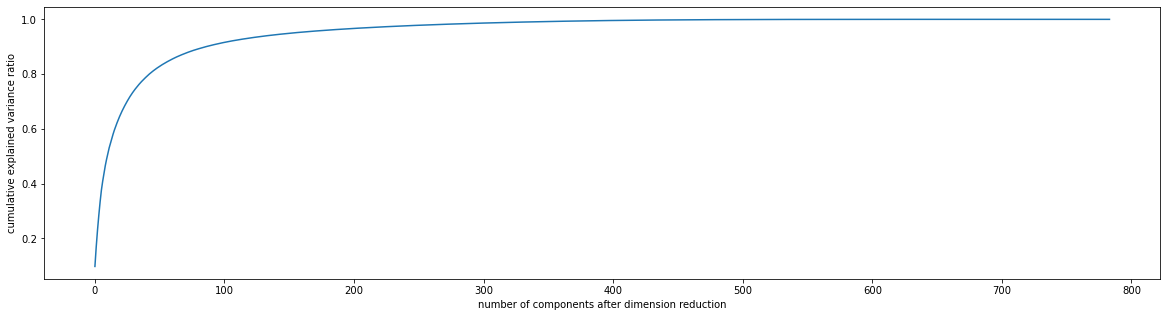

In [7]:
pca_line = PCA().fit(x)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

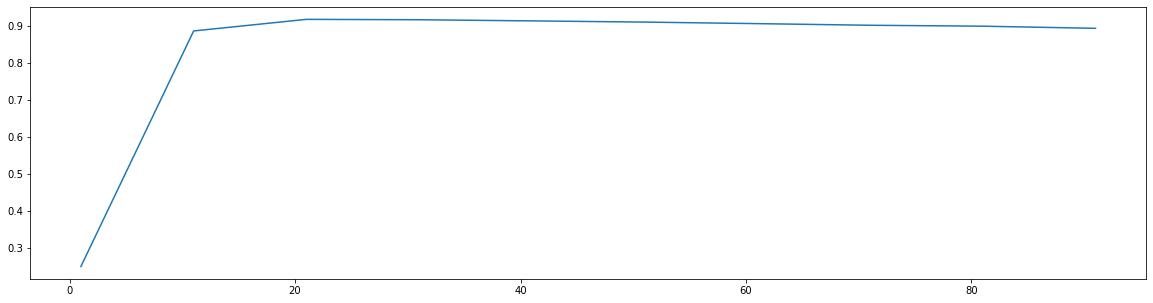

In [10]:
score = []

for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
    
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

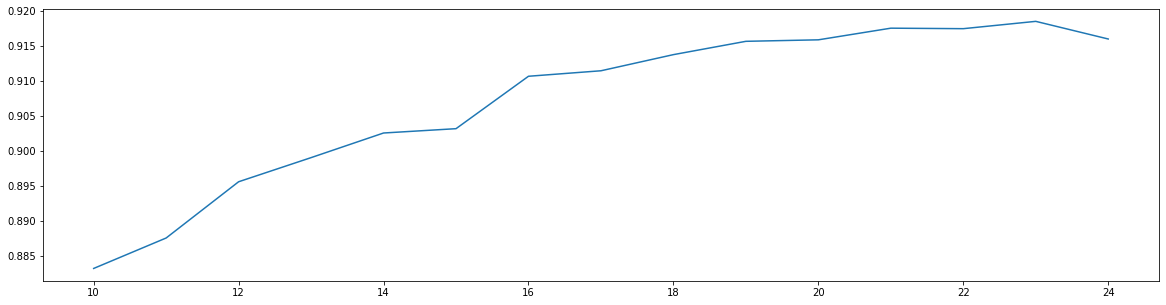

In [11]:
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

# 找出最佳维度进行降维并查看模型效果

In [13]:
x_dr = PCA(23).fit_transform(x)

cross_val_score(RFC(n_estimators=100, random_state=0), x_dr, y, cv=5).mean()

0.9454523809523809

# 改用KNN进行建模

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [15]:
cross_val_score(KNN(), x_dr, y, cv=5).mean()

0.9698333333333334

# 用模型曲线探索最佳超参数

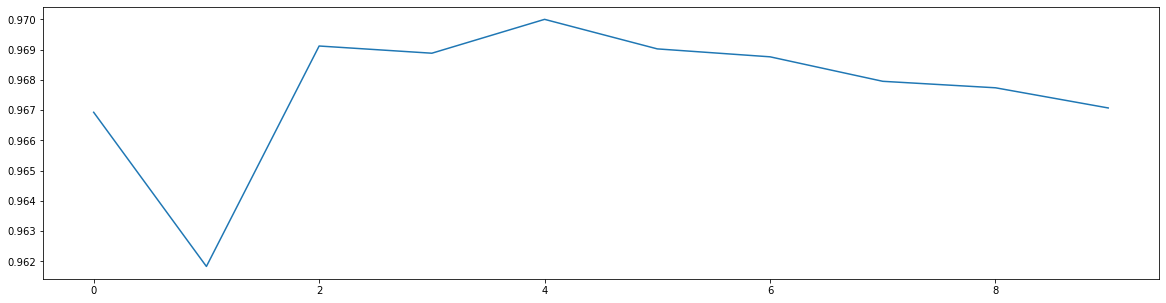

In [16]:
score = []

for i in range(10):
    X_dr = PCA(23).fit_transform(x)
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

查看最好的效果得分多少

In [17]:
cross_val_score(KNN(4), x_dr, y, cv=5).mean()

0.9689285714285715